# Expression Plots

Gene expression plots at single-cell level. Inputs:

1. Seurat object

In [16]:
library(Seurat)
library(ggplot2)
library(scattermore)
library(scales)
library(patchwork)

### Seurat Object

In [2]:
rna = readRDS("../analysis/20200828_RNA_Seurat/sessions/20210725_n59378/seurat.rds")

## Plotting

### Fig 1 Aesthetics

In [83]:
GENE = "FN1"

In [84]:
cur_gene = as.vector(rna[['RNA']][GENE])

df = data.frame(umap1=data.frame(Embeddings(rna, reduction='umap'))$UMAP_1, 
                umap2=data.frame(Embeddings(rna, reduction='umap'))$UMAP_2,
                expr=cur_gene)
# shuffle so days don't overlap
df = df[sample(dim(df)[1], 25000), ]


expr_plot <- ggplot(df) +
# ggplot(df[df$x.sp.sample %in% c("D14"), ]) +
 
# ggtitle(sub("-2[0-9]+", "",GENE)) + 
scale_color_viridis_c(option = "C", name="Log2\nExpr", 
                     limits=c(0,quantile(cur_gene, 0.98)), oob=squish) +
theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
    coord_fixed()

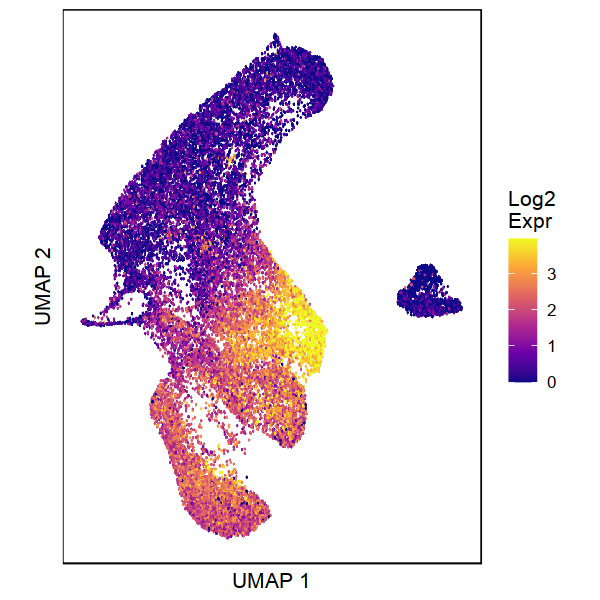

In [85]:
options(repr.plot.width = 5, repr.plot.height = 5)

expr_plot

In [86]:
saveRDS(expr_plot, file=sprintf("./Fig1/subfigs/%s_%s_expr_sc.rds",
                                   format(Sys.Date(), "%Y%m%d"), GENE))

### Fig 2 Aesthetics

In [9]:
GENE = "POU5F1"

In [7]:
# cur_gene = as.vector(rna[['RNA']][GENE])

# df = data.frame(umap1=data.frame(Embeddings(rna, reduction='umap'))$UMAP_1, 
#                 umap2=data.frame(Embeddings(rna, reduction='umap'))$UMAP_2,
#                 expr=as.vector(rna[['RNA']][GENE]))

plot_fig2 <- function(expr, title) {
    df = data.frame(umap1=data.frame(Embeddings(rna, reduction='umap'))$UMAP_1, 
                umap2=data.frame(Embeddings(rna, reduction='umap'))$UMAP_2,
                expr=expr)

    # shuffle so days don't overlap
    df = df[sample(dim(df)[1], 25000), ]    
    
    expr_plot <- ggplot(df) +
        # ggplot(df[df$x.sp.sample %in% c("D14"), ]) +
        geom_scattermore(pointsize=10, aes(x=umap1 , y=umap2, col=expr), pixels=c(3000,3000)) +
        # ggtitle(sub("-2[0-9]+", "",GENE)) + 
        scale_color_viridis_c(option = "C", name="Log \nExpression ",                      
                              limits=c(0,quantile(expr, .995)), oob=squish) +
        ggtitle(title) + 
        theme_classic() +
            xlab("UMAP 1") + ylab("UMAP 2") +
            theme(plot.title = element_text(hjust = 0.5, size=16),
                  text = element_text(size=12),
                  axis.line=element_blank(),
                  axis.text.x=element_blank(),
                  axis.text.y=element_blank(),
                  axis.ticks=element_blank(),
                  legend.position="bottom",
                  legend.justification="right",
                  panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
            coord_fixed()    
    
    expr_plot
}



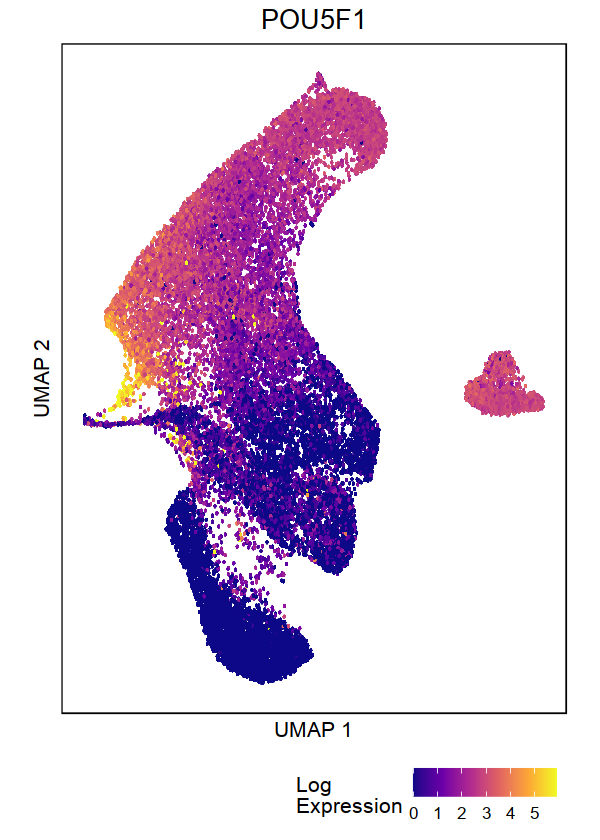

In [11]:
options(repr.plot.width = 5, repr.plot.height = 7)

expr_plot = plot_fig2(as.vector(rna[['RNA']][GENE]), GENE)
expr_plot

In [18]:
saveRDS(expr_plot, file=sprintf("./Fig2/subfigs/%s_%s_expr_sc.rds",
                                   format(Sys.Date(), "%Y%m%d"), GENE))

## S2 Endogenous/Exogenous

In [14]:
endo_exo_expr = read.table("../analysis/20211106_sendai_vs_endogenous/out/quants.tsv")
stopifnot(all(rownames(endo_exo_expr)==colnames(rna)))
head(endo_exo_expr)

,POU5F1_endo_cts,POU5F1_endo_norm,POU5F1_exo_cts,POU5F1_exo_norm,SOX2_endo_cts,SOX2_endo_norm,SOX2_exo_cts,SOX2_exo_norm,KLF4_endo_cts,KLF4_endo_norm,KLF4_exo_cts,KLF4_exo_norm,MYC_endo_cts,MYC_endo_norm,MYC_exo_cts,MYC_exo_norm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCAAGAGTGACC-1,0,0,0,0,0,0,0,0,1,0.5478637,1.437999e-23,1.049098e-23,0,0.0000000,0.000000e+00,0.000000e+00
AAACCCAAGTGCCAGA-1,0,0,0,0,0,0,0,0,0,0.0000000,0.000000e+00,0.000000e+00,2,0.9641610,7.320248e-17,5.938868e-17
AAACCCACACCATTCC-1,0,0,0,0,0,0,0,0,1,0.5261623,1.507851e-17,1.044074e-17,1,0.5261623,8.043161e-15,5.569285e-15
AAACCCACACGCGTCA-1,0,0,0,0,0,0,0,0,1,0.7583202,1.472511e-20,1.670839e-20,0,0.0000000,0.000000e+00,0.000000e+00
AAACCCAGTCCATAGT-1,0,0,0,0,0,0,0,0,0,0.0000000,0.000000e+00,0.000000e+00,0,0.0000000,0.000000e+00,0.000000e+00
AAACCCAGTTATTCTC-1,0,0,0,0,0,0,0,0,0,0.0000000,0.000000e+00,0.000000e+00,1,0.5299292,2.326522e-13,1.625801e-13


In [15]:
endo_POU5F1_plot = plot_fig2(endo_exo_expr$POU5F1_endo_norm, "POU5F1 (Endogenous)")
exo_POU5F1_plot = plot_fig2(endo_exo_expr$POU5F1_exo_norm, "POU5F1 (Sendai)")

endo_SOX2_plot = plot_fig2(endo_exo_expr$SOX2_endo_norm, "SOX2 (Endogenous)")
exo_SOX2_plot = plot_fig2(endo_exo_expr$SOX2_exo_norm, "SOX2 (Sendai)")

endo_KLF4_plot = plot_fig2(endo_exo_expr$KLF4_endo_norm, "KLF4 (Endogenous)")
exo_KLF4_plot = plot_fig2(endo_exo_expr$KLF4_exo_norm, "KLF4 (Sendai)")

endo_MYC_plot = plot_fig2(endo_exo_expr$MYC_endo_norm, "MYC (Endogenous)")
exo_MYC_plot = plot_fig2(endo_exo_expr$MYC_exo_norm, "MYC (Sendai)")

In [28]:
endo_exo_figs = (exo_POU5F1_plot | endo_POU5F1_plot | exo_SOX2_plot | endo_SOX2_plot | exo_KLF4_plot | endo_KLF4_plot | exo_MYC_plot | endo_MYC_plot)

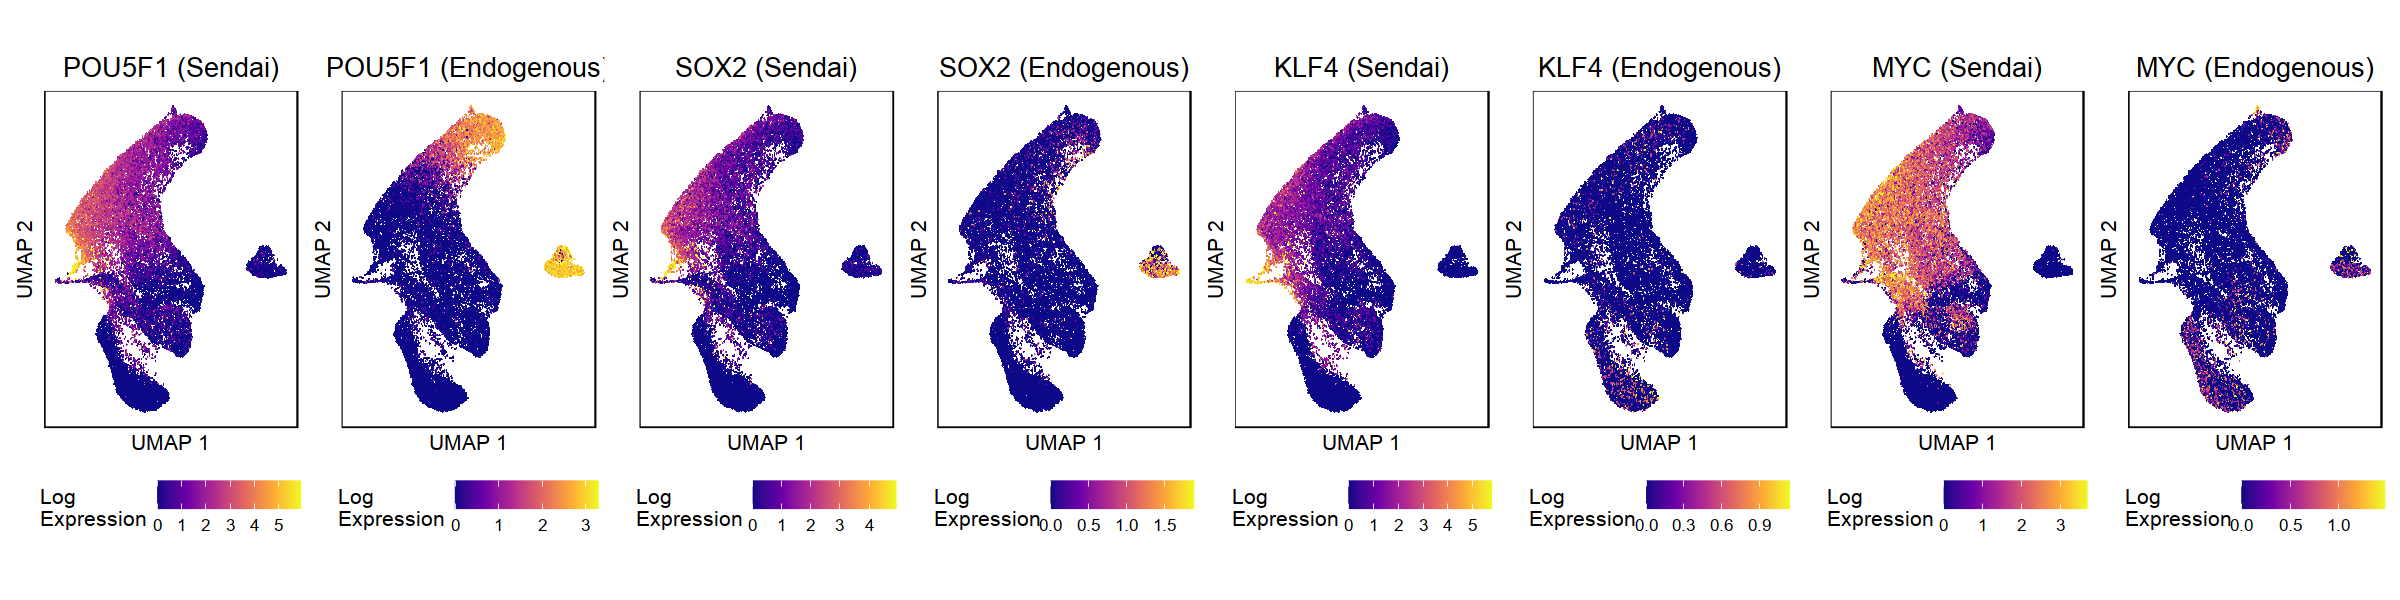

In [29]:
options(repr.plot.width = 20, repr.plot.height = 5)

endo_exo_figs

In [30]:
ggsave(endo_exo_figs, file="./Fig2/subfigs/20211116_endo_exo_OSKM_UMAP.pdf",
      height=5, width=20, useDingbats=F)

---

In [22]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.0.0 scales_1.1.0    scattermore_0.7 ggplot2_3.3.3  
[5] Seurat_3.1.5   

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [4] RColorBrewer_1.1-2  httr_1.4.1          repr_1.1.0         
 [7] sctransform_0.2.1   tools_3.6.3 